# Principios de Visualización de Datos pata BI
by @juniorpeves

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df = pd.read_csv('population_by_country_2020.csv')
Q1 =df[(df['Region'] == 'LATIN')  & (df['Med. Age'] > 0)]
Q1.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Region
7,Argentina,45267449,0.93%,415097,17,2736690,4800.0,2.3,32.0,93%,0.58%,LATIN
9,Aruba,106845,0.43%,452,593,180,201.0,1.9,41.0,44%,0.00%,LATIN
13,Bahamas,393893,0.97%,3762,39,10010,1000.0,1.8,32.0,86%,0.01%,LATIN
16,Barbados,287437,0.12%,350,668,430,-79.0,1.6,40.0,31%,0.00%,LATIN
19,Belize,398845,1.86%,7275,17,22810,1200.0,2.3,25.0,46%,0.01%,LATIN


##

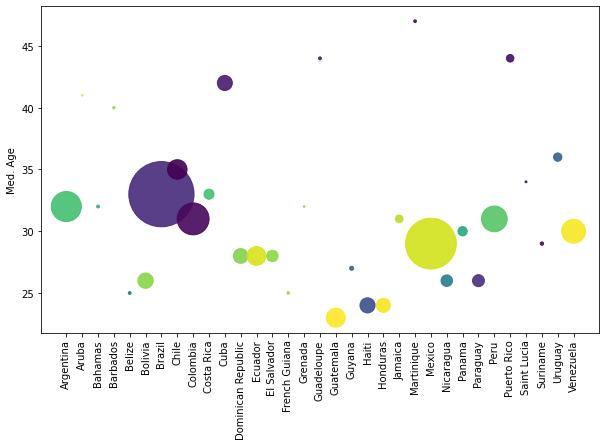

In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

colors = np.random.rand(len(Q1['Country (or dependency)']))

plt.figure(figsize=(10,6))
# use the scatter function
plt.scatter(Q1['Country (or dependency)'], 
            Q1['Med. Age'], 
            s=(Q1['Population (2020)']/50000), 
            alpha=0.9, 
            c=colors)
plt.xticks(rotation=90)
plt.ylabel("Med. Age")
# show the graph
plt.savefig('BubbleChart.png')
plt.show()

In [4]:
url_geojson = "peru_departamental_simple.geojson"
region_geojson = gpd.read_file(url_geojson)
region_geojson2 = gpd.read_file(url_geojson)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [5]:
df = pd.read_csv('Universidades.csv')
Q2 = df.groupby('DEPARTAMENTO').size().reset_index(name='Numero de Universidades')
Q2.head()
# df1 = DataFrame.groupby(Column).size().reset_index(name='Total')

,DEPARTAMENTO,Numero de Universidades
0,AMAZONAS,3
1,ANCASH,4
2,APURIMAC,3
3,AREQUIPA,7
4,AYACUCHO,3


In [6]:
region_geojson = region_geojson.merge(
    right = Q2,
    left_on= 'NOMBDEP',
    right_on= 'DEPARTAMENTO',
    how = 'left'
)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,DEPARTAMENTO,Numero de Universidades
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",AMAZONAS,3
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ANCASH,4
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",APURIMAC,3
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",AREQUIPA,7
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",AYACUCHO,3


<AxesSubplot:>

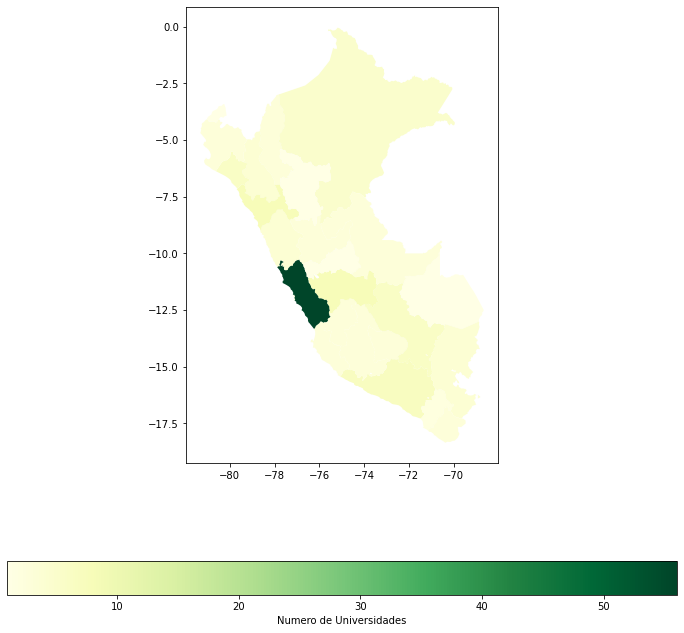

In [20]:
region_geojson.plot(column='Numero de Universidades',
                    legend=True,
                    legend_kwds= {
                        'label':'Numero de Universidades',
                        'orientation':'horizontal'},
                    cmap='YlGn',
                    figsize=(12,12)
                    )

     DEPARTAMENTO      2017
0        AMAZONAS  0.379384
1          ANCASH  1.083519
2        APURIMAC  0.405759
3        AREQUIPA  1.382730
4        AYACUCHO  0.616176
5       CAJAMARCA  1.341012
6          CALLAO  0.994494
7           CUSCO  1.205527
8    HUANCAVELICA  0.347639
9         HUANUCO  0.721047
10            ICA  0.850765
11          JUNIN  1.246038
12    LA LIBERTAD  1.778080
13     LAMBAYEQUE  1.197260
15         LORETO  0.883510
16  MADRE DE DIOS  0.141070
17       MOQUEGUA  0.174863
18          PASCO  0.254065
19          PIURA  1.856809
20           PUNO  1.172697
21     SAN MARTIN  0.813381
22          TACNA  0.329332
23         TUMBES  0.224863
24        UCAYALI  0.496459


<AxesSubplot:>

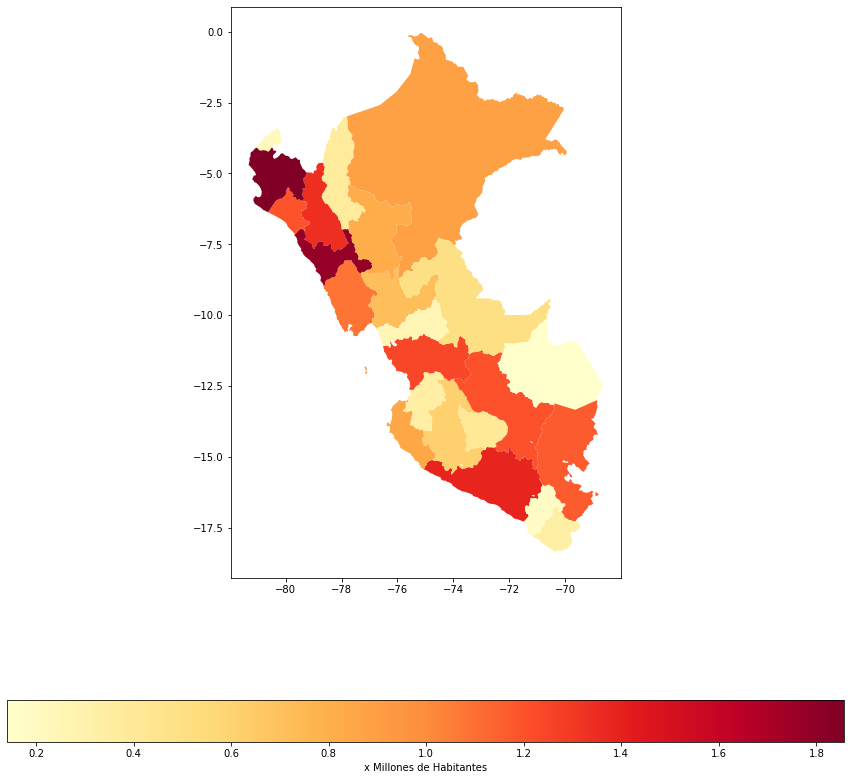

In [21]:
df1 = pd.read_csv('pob-censo-peru.csv')
df2 = pd.concat([df1['DEPARTAMENTO'], df1['2017']/1000000], axis=1)
df2 = df2[df2.DEPARTAMENTO != 'LIMA']
print(df2.sort_values(by=['DEPARTAMENTO'], ascending=True))

region_geojson2 = region_geojson.merge(
    right = df2,
    left_on= 'NOMBDEP',
    right_on= 'DEPARTAMENTO',
    how = 'left'
)
region_geojson2.head()

region_geojson2.plot(column='2017',
                    legend=True,
                    legend_kwds= {
                        'label':'x Millones de Habitantes',
                        'orientation':'horizontal'},
                    cmap='YlOrRd',
                    figsize=(15,15)
                    )

[Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

[Mapping and Plotting Tools - Geopandas](https://geopandas.org/en/stable/docs/user_guide/mapping.html)

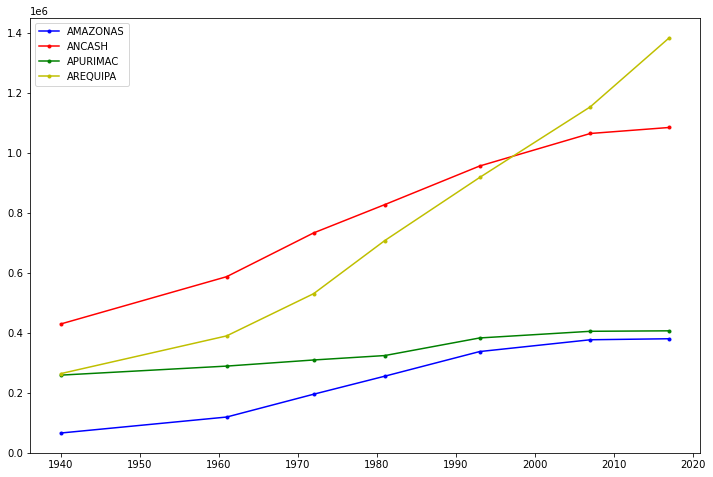

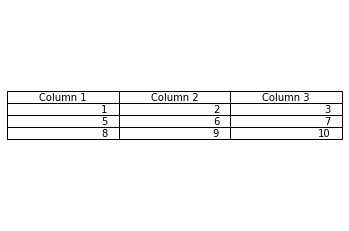

In [9]:
df3 = pd.read_csv('pob-censo-x-anho.csv')
df3 = df3.drop('LIMA', axis=1)
plt.figure(figsize=(12,8))
plt.plot(df3.AÑO, df3['AMAZONAS'],'b.-', label='AMAZONAS')
plt.plot(df3.AÑO, df3['ANCASH'],'r.-', label='ANCASH')
plt.plot(df3.AÑO, df3['APURIMAC'],'g.-', label='APURIMAC')
plt.plot(df3.AÑO, df3['AREQUIPA'],'y.-', label='AREQUIPA')
plt.legend()
plt.show()

plt.show()


In [14]:
list(df3['ANCASH'])

[428467, 586214, 732092, 826399, 955023, 1063459, 1083519]